In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

birddata = pd.read_csv("bird_tracking.csv", index_col=0)
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [152]:
birddata.info

<bound method DataFrame.info of        altitude               date_time  device_info_serial   direction   latitude  longitude  speed_2d bird_name
0            71  2013-08-15 00:18:08+00                 851 -150.469753  49.419860   2.120733  0.150000      Eric
1            68  2013-08-15 00:48:07+00                 851 -136.151141  49.419880   2.120746  2.438360      Eric
2            68  2013-08-15 01:17:58+00                 851  160.797477  49.420310   2.120885  0.596657      Eric
3            73  2013-08-15 01:47:51+00                 851   32.769360  49.420359   2.120859  0.310161      Eric
4            69  2013-08-15 02:17:42+00                 851   45.191230  49.420331   2.120887  0.193132      Eric
...         ...                     ...                 ...         ...        ...        ...       ...       ...
61915        11  2014-04-30 22:00:08+00                 833   45.448157  51.352572   3.177151  0.208087     Sanne
61916         6  2014-04-30 22:29:57+00                 

In [153]:
birddata.tail()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne
61919,9,2014-04-30 23:59:34+00,833,149.949008,51.354474,3.181057,0.485489,Sanne


The data consists of almost **62,000** data points and 9 features or columns

In [154]:
birddata.bird_name.value_counts()

Nico     21121
Sanne    21004
Eric     19795
Name: bird_name, dtype: int64

There are **3 types of birds** in our dataset, named *Nico*, *Sanne*, *Eric*

Linear estimation - because the earth is not flat - of flight trajectory of bird migration of a particular bird **"Eric"**. The trajectory will be substantially distorted because we have not done any *Cartographic Projection* of the flight trajectory.

This plot is just to get a rought look at the flight trajectory of a bird

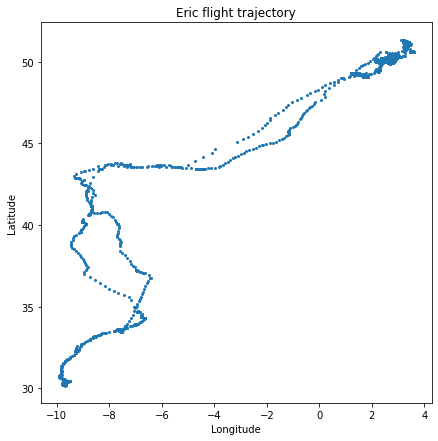

In [155]:
ind = birddata.bird_name == "Eric"
x, y = birddata.longitude[ind], birddata.latitude[ind]
plt.figure(figsize=(7,7))
plt.plot(x, y, "o", ms=2)
plt.savefig("Eric_migration_2D_traj.pdf")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Eric flight trajectory")
plt.show()

Let's plot the flight trajectory for all of three birds

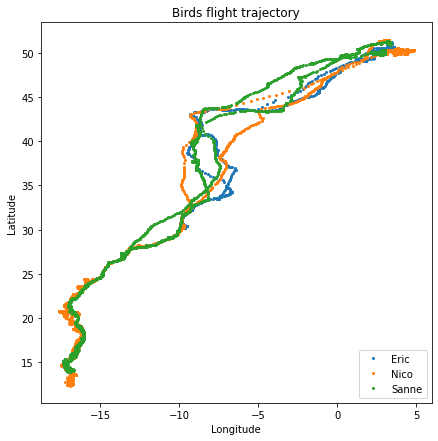

In [156]:
birds = birddata.bird_name.unique()
plt.figure(figsize=(7,7))
for bird in birds:
    ind = birddata.bird_name == bird
    x, y = birddata.longitude[ind], birddata.latitude[ind]
    plt.plot(x, y, "o", ms=2, label=bird)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Birds flight trajectory")
plt.legend(loc="lower right")
plt.savefig("birds_flight_traj.pdf")
plt.show()

To further proceed, we would like to chech if our data consists of **missing values** and handle them accordingly
We'll be using sklearn for the preprocessing of the data and handling the missing values

In [157]:
birddata.isnull().sum()

altitude                0
date_time               0
device_info_serial      0
direction             443
latitude                0
longitude               0
speed_2d              443
bird_name               0
dtype: int64

Two columns *direction* and *speed_2d* consists of same no. of missing values but for **direction** column **mean is not an appropriate approximation**. Therefor we'll first impute **speed_2d** with mean and then we'll use **n_neighbours strategy** for imputation of **direction**

In [158]:
from sklearn.impute import SimpleImputer, KNNImputer
# default args are what we want i.e. missing_values=nan, strategy='mean'
imputer = SimpleImputer()
birddata["speed_2d"] = imputer.fit_transform(birddata[['speed_2d']])

In [159]:
birddata.isnull().sum()

altitude                0
date_time               0
device_info_serial      0
direction             443
latitude                0
longitude               0
speed_2d                0
bird_name               0
dtype: int64

Let's impute the **direction** column with default args

In [160]:
imputer = KNNImputer()
imputer.fit(birddata.loc[:, 'direction':'speed_2d'])
birddata.loc[:, 'direction':'speed_2d'] = imputer.transform(birddata.loc[:, 'direction':'speed_2d'])

In [161]:
birddata.tail()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne
61919,9,2014-04-30 23:59:34+00,833,149.949008,51.354474,3.181057,0.485489,Sanne


Ommit the last row as it's unnecessarily introduced into the dataset.

In [162]:
birddata = birddata.iloc[:-1, :]
birddata.tail()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
61914,-10,2014-04-30 21:29:45+00,833,-10.057916,51.352661,3.177122,5.531148,Sanne
61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne


In [163]:
birddata.isnull().sum()

altitude              0
date_time             0
device_info_serial    0
direction             0
latitude              0
longitude             0
speed_2d              0
bird_name             0
dtype: int64

Let's try plotting a *histogram* of *speed_2d* for a particular bird **Eric** 

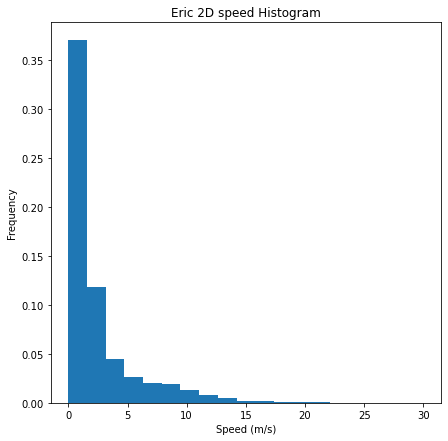

In [164]:
# ind is already defined above for "Eric"
speed = birddata.speed_2d[ind]
plt.figure(figsize=(7,7))
plt.hist(speed, bins=np.linspace(0,30,20), density=True)
plt.title("Eric 2D speed Histogram")
plt.xlabel("Speed (m/s)")
plt.ylabel("Frequency")
plt.savefig("Eric_2D_speed_hist.pdf")
plt.show()

Notice that in our dataset we have a column that consists of datetime, so lets check what is the datatype of this column

In [165]:
type(birddata.date_time[0])

str

In [166]:
birddata.date_time[0]

'2013-08-15 00:18:08+00'

datetime in our dataset is in str format and to be able to perform computation - computing time interval between two data points - on datetime we would like it convert to a datetime object

In [167]:
import datetime as dt
# remove '+00 from the strings as the time is already in UTC'
timestamps = birddata.date_time
timestamps = [stamp[:-3] for stamp in timestamps]

In [168]:
timestamps[:3]

['2013-08-15 00:18:08', '2013-08-15 00:48:07', '2013-08-15 01:17:58']

In [169]:
# convert str to a datetime object to be able to perform arithmetic operation on it
timestamps = list(map(lambda str_stamp: dt.datetime.strptime(
    str_stamp, "%Y-%m-%d %H:%M:%S"), timestamps))

In [176]:
birddata["timestamp"] = pd.Series(timestamps, index=birddata.index)

<ipython-input-176-c00b406e24ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birddata["timestamp"] = pd.Series(timestamps, index=birddata.index)


In [177]:
birddata.tail()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
61914,-10,2014-04-30 21:29:45+00,833,-10.057916,51.352661,3.177122,5.531148,Sanne,2014-04-30 21:29:45
61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne,2014-04-30 22:00:08
61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne,2014-04-30 22:29:57
61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne,2014-04-30 22:59:52
61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne,2014-04-30 23:29:43


In [180]:
birddata.timestamp[0]

Timestamp('2013-08-15 00:18:08')